## Gantt-kaavio 5.2.2025

In [36]:
# Tuodaan kirjastot

# Laskentaa varten

import numpy as np

#Kuvioita varten
import matplotlib
import matplotlib.pyplot as plt

#Ajanhallintaa
import datetime as dt

In [37]:
df = pd.DataFrame({'task': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
                  'team': ['TKI', 'Kirjanpito', 'Myynti', 'Myynti', 'IT', 'TKI', 'IT', 'Myynti', 'Kirjanpito', 'Kirjanpito', 'Myynti', 'IT'],
                  'start': pd.to_datetime(['20 Sep 2024', '24 Sep 2024', '26 Sep 2024', '30 Sep 2024', '3 Oct 2024', '7 Oct 2024', '10 Oct 2024', '14 Oct 2024', '18 Oct 2024', '23 Oct 2024', '28 Oct 2024', '31 Oct 2024']),
                  'end': pd.to_datetime(['30 Sep 2024', '28 Sep 2024', '30 Sep 2024', '8 Oct 2024', '9 Oct 2024', '18 Oct 2024', '17 Oct 2024', '22 Oct 2024', '23 Oct 2024', '1 Nov 2024', '5 Nov 2024', '5 Nov 2024']),
                  'completion_frac': [1, 1, 1, 1, 1, 0.95, 0.7, 0.35, 0.1, 0, 0, 0]})
df

,task,team,start,end,completion_frac
0,A,TKI,2024-09-20,2024-09-30,1.00
1,B,Kirjanpito,2024-09-24,2024-09-28,1.00
2,C,Myynti,2024-09-26,2024-09-30,1.00
3,D,Myynti,2024-09-30,2024-10-08,1.00
4,E,IT,2024-10-03,2024-10-09,1.00
5,F,TKI,2024-10-07,2024-10-18,0.95
6,G,IT,2024-10-10,2024-10-17,0.70
7,H,Myynti,2024-10-14,2024-10-22,0.35
8,I,Kirjanpito,2024-10-18,2024-10-23,0.10
9,J,Kirjanpito,2024-10-23,2024-11-01,0.00


In [38]:
df['days_to_start'] = (df['start'] - df['start'].min()).dt.days

df['days_to_end'] = (df['end'] - df['start'].min()).dt.days

df['task_duration'] = df['days_to_end'] - df['days_to_start'] + 1  # Huomaa ykkönen. Näin saadaan aloitus- ja lopetuspäivät mukaan.

df['completion_days'] = df['completion_frac'] * df['task_duration']

df

,task,team,start,end,completion_frac,days_to_start,days_to_end,task_duration,completion_days
0,A,TKI,2024-09-20,2024-09-30,1.00,0,10,11,11.00
1,B,Kirjanpito,2024-09-24,2024-09-28,1.00,4,8,5,5.00
2,C,Myynti,2024-09-26,2024-09-30,1.00,6,10,5,5.00
3,D,Myynti,2024-09-30,2024-10-08,1.00,10,18,9,9.00
4,E,IT,2024-10-03,2024-10-09,1.00,13,19,7,7.00
5,F,TKI,2024-10-07,2024-10-18,0.95,17,28,12,11.40
6,G,IT,2024-10-10,2024-10-17,0.70,20,27,8,5.60
7,H,Myynti,2024-10-14,2024-10-22,0.35,24,32,9,3.15
8,I,Kirjanpito,2024-10-18,2024-10-23,0.10,28,33,6,0.60
9,J,Kirjanpito,2024-10-23,2024-11-01,0.00,33,42,10,0.00


Nyt voidaankin tehdä perusmuotoinen Gantt-kaavio tälle projektille.

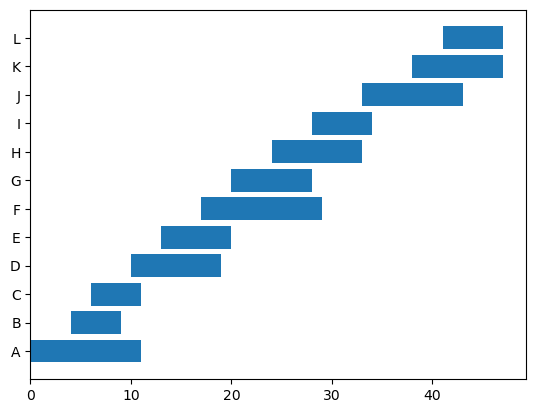

In [39]:
plt.barh(y=df['task'], width=df['task_duration'], left=df['days_to_start'])
plt.show()

In [40]:
# 1
df2 = df[df['team']=='Myynti'][['task', 'team', 'start', 'end']]

# 2
df2.rename(columns={'start': 'start_1', 'end': 'end_1'}, inplace=True)
df2.reset_index(drop=True, inplace=True)

# 3
df2['start_2'] = pd.to_datetime([None, '10 Oct 2024', '25 Oct 2024', None])
df2['end_2'] = pd.to_datetime([None, '14 Oct 2024', '28 Oct 2024', None])
df2['start_3'] = pd.to_datetime([None, None, '1 Dec 2024', None])
df2['end_3'] = pd.to_datetime([None, None, '5 Dec 2024', None])

# 4
for i in [1, 2, 3]:
    suffix = '_' + str(i)
    df2['days_to_start' + suffix] = (df2['start' + suffix] - df2['start_1'].min()).dt.days
    df2['days_to_end' + suffix] = (df2['end' + suffix] - df2['start_1'].min()).dt.days
    df2['task_duration' + suffix] = df2['days_to_end' + suffix] - df2['days_to_start' + suffix] + 1


df2

,task,team,start_1,end_1,start_2,end_2,start_3,end_3,days_to_start_1,days_to_end_1,task_duration_1,days_to_start_2,days_to_end_2,task_duration_2,days_to_start_3,days_to_end_3,task_duration_3
0,C,Myynti,2024-09-26,2024-09-30,NaT,NaT,NaT,NaT,0,4,5,NaN,NaN,NaN,NaN,NaN,NaN
1,D,Myynti,2024-09-30,2024-10-08,2024-10-10,2024-10-14,NaT,NaT,4,12,9,14.0,18.0,5.0,NaN,NaN,NaN
2,H,Myynti,2024-10-14,2024-10-22,2024-10-25,2024-10-28,2024-12-01,2024-12-05,18,26,9,29.0,32.0,4.0,66.0,70.0,5.0
3,K,Myynti,2024-10-28,2024-11-05,NaT,NaT,NaT,NaT,32,40,9,NaN,NaN,NaN,NaN,NaN,NaN


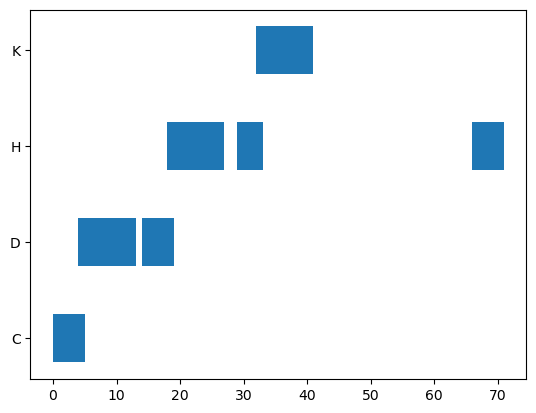

In [41]:
# 1
fig, ax = plt.subplots()

# 2
for index, row in df2.iterrows():
    if row['start_2'] is None:
        ax.barh(y=df2['task'], width=df2['task_duration_1'], left=df2['days_to_start_1'])
    elif row['start_2'] is not None and row['start_3'] is None:
        ax.broken_barh(xranges=[(row['days_to_start_1'], row['task_duration_1']), (row['days_to_start_2'], row['task_duration_2'])], yrange=(index + 1, 0.5))
    else:
        ax.broken_barh(xranges=[(row['days_to_start_1'], row['task_duration_1']), (row['days_to_start_2'], row['task_duration_2']), (row['days_to_start_3'], row['task_duration_3'])], yrange=(index + 1, 0.5))

# 3
ax.set_yticks([1.25, 2.25, 3.25, 4.25])
ax.set_yticklabels(df2['task'])

plt.show()

In [42]:
ax.barh(y=df2['task'], width=df2['task_duration_1'], left=df2['days_to_start_1'])

<BarContainer object of 4 artists>

In [43]:
ax.broken_barh(xranges=[(row['days_to_start_1'], row['task_duration_1'])], yrange=(index + 1, 0.5))

In [44]:
df

,task,team,start,end,completion_frac,days_to_start,days_to_end,task_duration,completion_days
0,A,TKI,2024-09-20,2024-09-30,1.00,0,10,11,11.00
1,B,Kirjanpito,2024-09-24,2024-09-28,1.00,4,8,5,5.00
2,C,Myynti,2024-09-26,2024-09-30,1.00,6,10,5,5.00
3,D,Myynti,2024-09-30,2024-10-08,1.00,10,18,9,9.00
4,E,IT,2024-10-03,2024-10-09,1.00,13,19,7,7.00
5,F,TKI,2024-10-07,2024-10-18,0.95,17,28,12,11.40
6,G,IT,2024-10-10,2024-10-17,0.70,20,27,8,5.60
7,H,Myynti,2024-10-14,2024-10-22,0.35,24,32,9,3.15
8,I,Kirjanpito,2024-10-18,2024-10-23,0.10,28,33,6,0.60
9,J,Kirjanpito,2024-10-23,2024-11-01,0.00,33,42,10,0.00


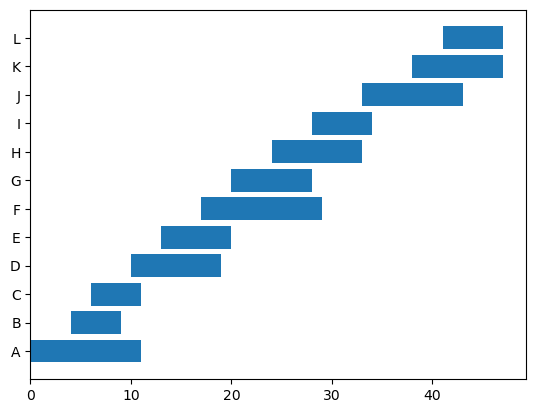

In [45]:
plt.barh(y=df['task'], width=df['task_duration'], left=df['days_to_start'])
plt.show()

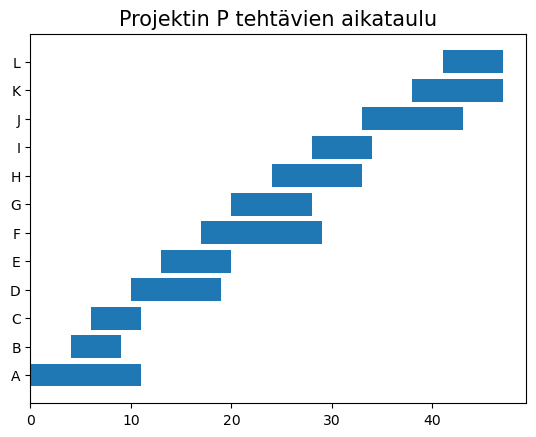

In [46]:
plt.barh(y=df['task'], width=df['task_duration'], left=df['days_to_start'])
plt.title('Projektin P tehtävien aikataulu', fontsize=15)
plt.show()

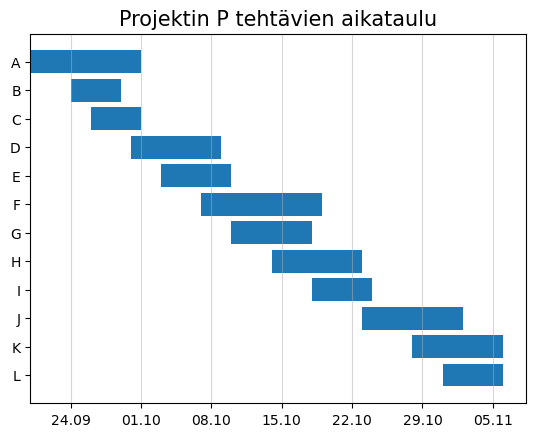

In [47]:
# 1
fig, ax = plt.subplots()

plt.barh(y=df['task'], width=df['task_duration'], left=df['days_to_start'] + 1)
plt.title('Projektin P tehtävien aikataulu', fontsize=15)

# 2
plt.gca().invert_yaxis()

# 3
xticks = np.arange(5, df['days_to_end'].max() + 2, 7)

# 4
xticklabels = pd.date_range(start=df['start'].min() + dt.timedelta(days=4), end=df['end'].max()).strftime("%d.%m")
# 5
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels[::7])

# 6
ax.xaxis.grid(True, alpha=0.5)

plt.show()

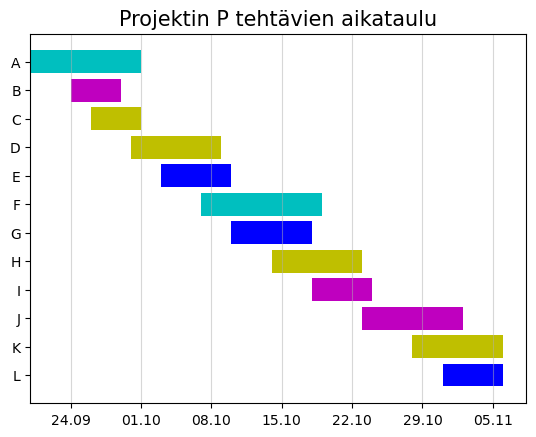

In [48]:
# 1
team_colors = {'TKI': 'c', 'Kirjanpito': 'm', 'Myynti': 'y', 'IT': 'b'}

# 2
fig, ax = plt.subplots()

# 3
for index, row in df.iterrows():
    plt.barh(y=row['task'], width=row['task_duration'], left=row['days_to_start'] + 1, color=team_colors[row['team']])

# 4
plt.title('Projektin P tehtävien aikataulu', fontsize=15)
plt.gca().invert_yaxis()
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels[::7])
ax.xaxis.grid(True, alpha=0.5)
plt.show()

In [49]:
patches = []
for team in team_colors:
    patches.append(matplotlib.patches.Patch(color=team_colors[team]))

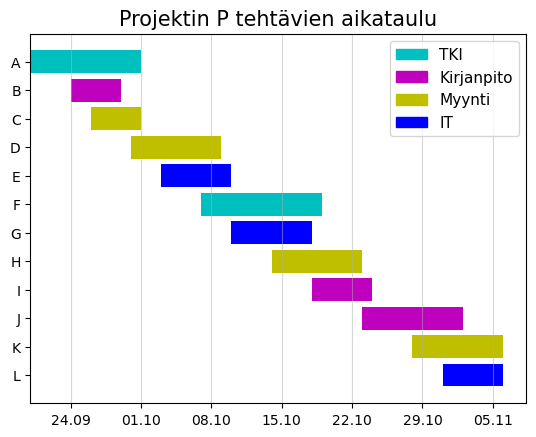

In [50]:
fig, ax = plt.subplots()
for index, row in df.iterrows():
    plt.barh(y=row['task'], width=row['task_duration'], left=row['days_to_start'] + 1, color=team_colors[row['team']])
plt.title('Projektin P tehtävien aikataulu', fontsize=15)
plt.gca().invert_yaxis()
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels[::7])
ax.xaxis.grid(True, alpha=0.5)

# Adding a legend
ax.legend(handles=patches, labels=team_colors.keys(), fontsize=11)

plt.show()

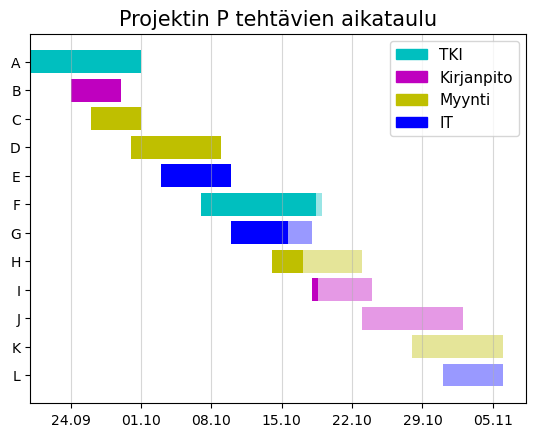

In [51]:
fig, ax = plt.subplots()

for index, row in df.iterrows():

    # Adding a lower bar - for the overall task duration
    plt.barh(y=row['task'], width=row['task_duration'], left=row['days_to_start'] + 1, color=team_colors[row['team']], alpha=0.4)

    # Adding an upper bar - for the status of completion
    plt.barh(y=row['task'], width=row['completion_days'], left=row['days_to_start'] + 1, color=team_colors[row['team']])

plt.title('Projektin P tehtävien aikataulu', fontsize=15)
plt.gca().invert_yaxis()
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels[::7])
ax.xaxis.grid(True, alpha=0.5)
ax.legend(handles=patches, labels=team_colors.keys(), fontsize=11)
plt.show()

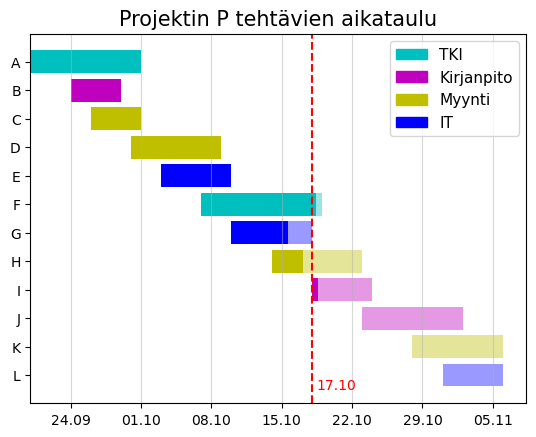

In [53]:
fig, ax = plt.subplots()
for index, row in df.iterrows():
    plt.barh(y=row['task'], width=row['task_duration'], left=row['days_to_start'] + 1, color=team_colors[row['team']], alpha=0.4)
    plt.barh(y=row['task'], width=row['completion_days'], left=row['days_to_start'] + 1, color=team_colors[row['team']])

plt.title('Projektin P tehtävien aikataulu', fontsize=15)
plt.gca().invert_yaxis()
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels[::7])
ax.xaxis.grid(True, alpha=0.5)
ax.legend(handles=patches, labels=team_colors.keys(), fontsize=11)

# Marking the current date on the chart
ax.axvline(x=29, color='r', linestyle='dashed')
ax.text(x=29.5, y=11.5, s='17.10', color='r')

plt.show()